In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the necessary libraries for data manipulation(pandas) and visualization(matplotlib and seaborn).

In [2]:
# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin-data.csv')
data.head()

## Loading the Wisconsin Breast Cancer Dataset from a CSV file and displaying the first few rows to understand its structure.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.drop('id', axis=1, inplace=True)

##  This code removes the id column from the dataset. The id column is typically used as a unique identifier for each record and does not contribute to the predictive analysis. Dropping this column helps in focusing on the relevant features for the analysis.


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

## This code identifies any missing values in the dataset by applying the isnull() function, which generates a DataFrame of boolean values. It then sums these values to count the number of missing entries in each column. The results are displayed to highlight any columns that might need data cleaning or imputation.


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Convert diagnosis column to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
print(data['diagnosis'].head())

 ## The diagnosis column, which originally contains categorical values ('M' for malignant and 'B' for benign), is converted to numerical values for analysis. 'M' is mapped to 1, and 'B' is mapped to 0. The head() function is used again to display the first few entries in the updated diagnosis column.

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [6]:
# Summarize dataset statistics(mean, median, count)
summary_stats = data.describe().T
summary_stats['median'] = data.median()
summary_stats['count'] = data.count()
print(summary_stats[['mean', 'median', 'count']])

## Summarizing the dataset to get an overview of the data. This includes calculating the mean, median, and count for each feature.

                               mean      median  count
diagnosis                  0.372583    0.000000    569
radius_mean               14.127292   13.370000    569
texture_mean              19.289649   18.840000    569
perimeter_mean            91.969033   86.240000    569
area_mean                654.889104  551.100000    569
smoothness_mean            0.096360    0.095870    569
compactness_mean           0.104341    0.092630    569
concavity_mean             0.088799    0.061540    569
concave points_mean        0.048919    0.033500    569
symmetry_mean              0.181162    0.179200    569
fractal_dimension_mean     0.062798    0.061540    569
radius_se                  0.405172    0.324200    569
texture_se                 1.216853    1.108000    569
perimeter_se               2.866059    2.287000    569
area_se                   40.337079   24.530000    569
smoothness_se              0.007041    0.006380    569
compactness_se             0.025478    0.020450    569
concavity_

In [7]:
data.corr()

## Calculating the correlation matrix to understand the relationships between different features in the dataset.The resulting matrix shows the correlation coefficients between the features, which helps in understanding the relationships and dependencies among them. High correlation values (close to 1 or -1) indicate strong relationships, while values close to 0 indicate weak relationships.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


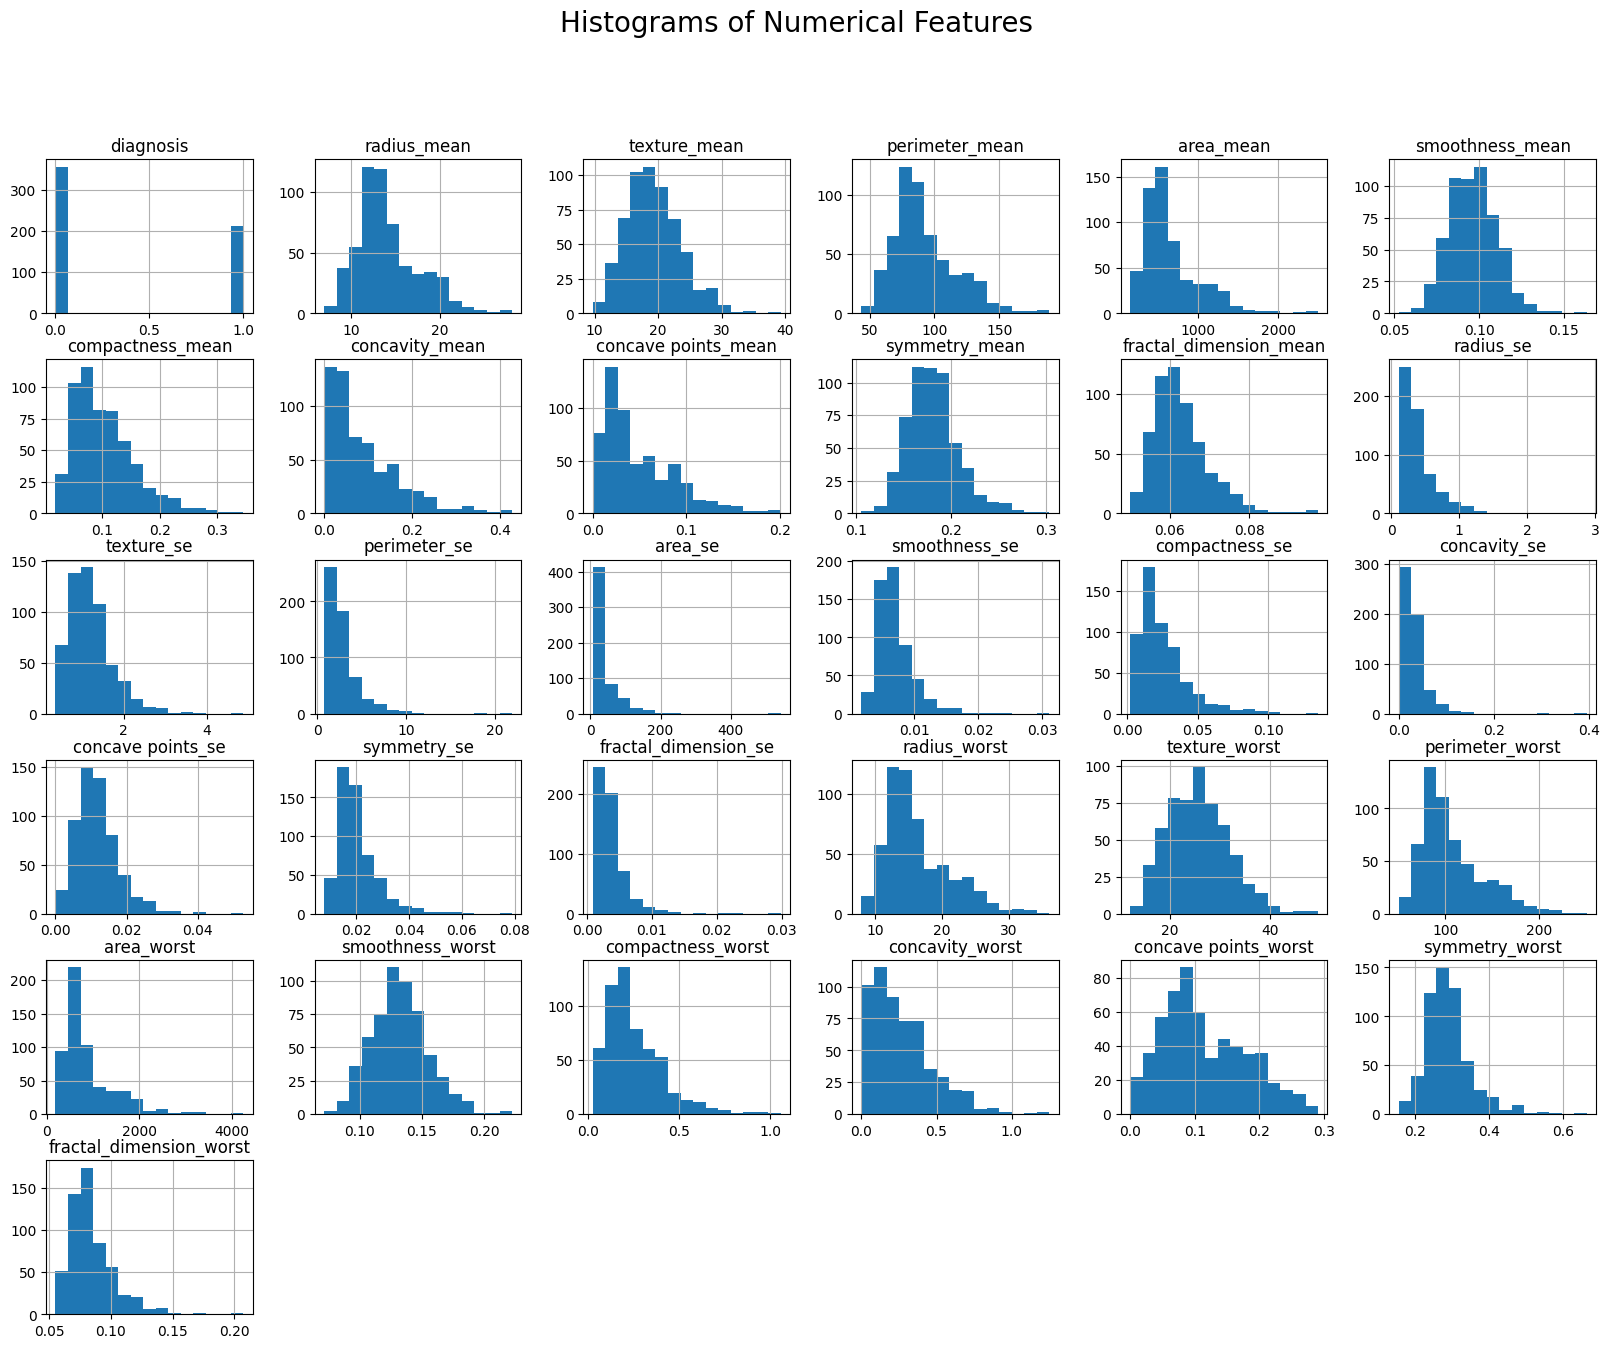

In [8]:
# Visualize the data
# Create histograms for numerical featuers
data.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20 )
plt.show()

## Creating histograms for numerical features to visualize their distributions. This helps in understanding the spread and central tendency of the data.

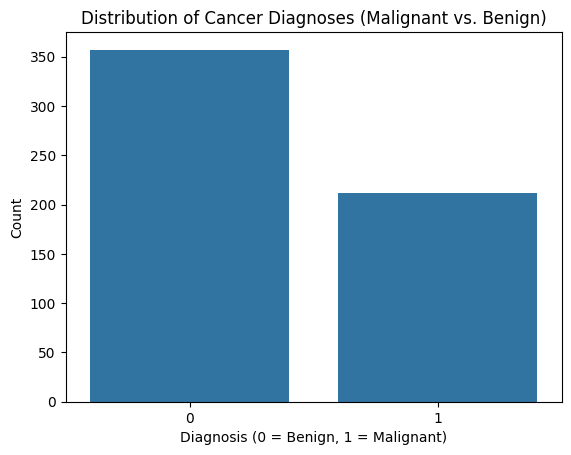

In [9]:
# Plot bar chart for categorical feature ('diagnosis'):
# Bar chart for diagnosis distribution
sns.countplot(x='diagnosis', data=data)
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.title('Distribution of Cancer Diagnoses (Malignant vs. Benign)')
plt.show()

## Plotting a bar chart to show the distribution of cancer diagnosis. This helps in visualizing the proportion of benign and malignant cases.

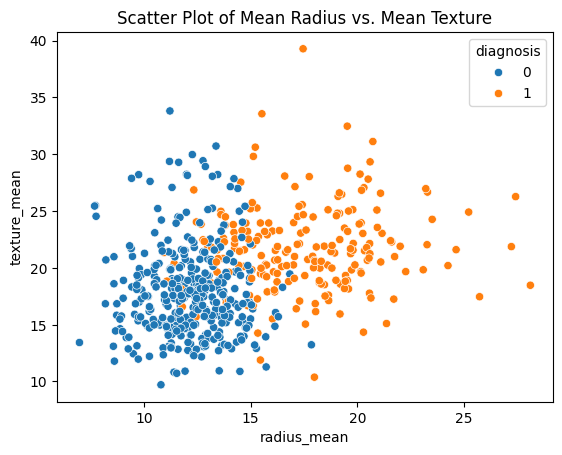

In [10]:
# Scatter plot for two features
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.show()

## Creating a scatter plot to visualize the relationship between 'radius_mean' and 'texture_mean' colored by diagnosis. This helps in identifying any patterns or correlations between these features.

In [11]:
# Distribution of cancer diagnoses
diagnosis_distribution = data['diagnosis'].value_counts()
print("\nDistribution of cancer diagnoses (0 = Benign, 1 = Malignant):\n", diagnosis_distribution)

##This code calculates and prints the distribution of cancer diagnoses to understand the balance of the dataset.


Distribution of cancer diagnoses (0 = Benign, 1 = Malignant):
 diagnosis
0    357
1    212
Name: count, dtype: int64


In [12]:
# Feature with the highest correlation with cancer diagnosis
correlation_matrix = data.corr()
highest_corr_feature = correlation_matrix['diagnosis'].sort_values(ascending=False).index[1]
print(f"\nThe feature with the highest correlation with cancer diagnosis is: {highest_corr_feature}")

## Calculating the correlation matrix to find the feature with the highest correlation with the cancer diagnosis. This helps in identifying the most significant predictor of cancer diagnosis.


The feature with the highest correlation with cancer diagnosis is: concave points_worst
